**OBJECTIVE**
---

To develop a data-driven pricing model for Airbnb properties that optimizes profitability, occupancy
rates, and customer satisfaction while addressing challenges such as fraud detection, compliance with
local laws, and identification of factors influencing property performance. This model aims to provide
actionable insights to property owners and hosts for effective pricing strategies, customer
segmentation, fraud prevention, and enhancing user experience, ensuring sustained growth and
compliance within the diverse Airbnb marketplace.

**Business Question**



1.   What is the optimal price for my property based on factors such as accomodation,no of bathrooms, no of bedrooms and beds etc?
2.  What factors most significantly influence the pricing of Airbnb properties?
3. What is the effect of reviews on pricing?
4. What is the effect of property type in pricing?
5. what are the difference in price according to the feature?
6. what are the factors through which host can raise their pricing?


**Discussion on Data Set**


This dataset would likely comprise structured data, such as numerical figures for property details, time-
series data for pricing trends, categorical data for property types and locations, and possibly
unstructured text data from reviews and feedback.
An effective analysis of this dataset would involve data cleaning, feature engineering to extract valuable
insights, exploratory data analysis to understand correlations and patterns, and the development of
predictive models for price optimization, fraud detection, and customer segmentation.



**Data Set Source Information**

Data set retrieve from Inside AirBnB website.

http://insideairbnb.com/get-the-data

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/listings.csv')
all_data=df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39160 entries, 0 to 39159
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            39160 non-null  int64  
 1   listing_url                                   39160 non-null  object 
 2   scrape_id                                     39160 non-null  int64  
 3   last_scraped                                  39160 non-null  object 
 4   source                                        39160 non-null  object 
 5   name                                          39160 non-null  object 
 6   description                                   38600 non-null  object 
 7   neighborhood_overview                         22756 non-null  object 
 8   picture_url                                   39160 non-null  object 
 9   host_id                                       39160 non-null 

In [ ]:
pd.set_option('display.max_columns', None)
df.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9357,https://www.airbnb.com/rooms/9357,20231101183950,2023-11-02,city scrape,Rental unit in New York · ★4.52 · Studio · 1 b...,"Cozy & comfy studio on a quiet, tree-lined str...",Quiet residential block near many restaurants ...,https://a0.muscache.com/pictures/90036/4e60665...,30193,https://www.airbnb.com/users/show/30193,Tommi,2009-08-06,"New York, NY",I am a spirit-minded alternative health practi...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/user/22ea4...,https://a0.muscache.com/im/pictures/user/22ea4...,Hell's Kitchen,1.0,1.0,"['email', 'phone']",t,t,"New York, United States",Hell's Kitchen,Manhattan,40.76724,-73.98664,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Cooking basics"", ""Paid washer \u2013 In buil...",$175.00,45,365,45,90,365,365,67.9,365.0,NaN,t,16,46,76,340,2023-11-02,58,0,0,2009-10-04,2017-08-13,4.52,4.68,4.16,4.97,5.00,4.95,4.58,NaN,f,1,1,0,0,0.34
1,10452,https://www.airbnb.com/rooms/10452,20231101183950,2023-11-02,city scrape,Rental unit in Brooklyn · ★4.65 · 1 bedroom · ...,Great location.<br /><br /><b>The space</b><br...,Great neighborhood with lots of restaurants an...,https://a0.muscache.com/pictures/16336315/c4bf...,35935,https://www.airbnb.com/users/show/35935,Angela,2009-09-03,"New York, NY",Loves to travel and host.,within a few hours,89%,58%,t,https://a0.muscache.com/im/users/35935/profile...,https://a0.muscache.com/im/users/35935/profile...,Bedford-Stuyvesant,4.0,5.0,"['email', 'phone']",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68294,-73.95682,Private room in rental unit,Private room,2,NaN,1 shared bath,NaN,2.0,"[""Cooking basics"", ""Kitchen"", ""Dishes and silv...",$90.00,30,730,30,30,730,730,30.0,730.0,NaN,t,12,12,15,290,2023-11-02,80,2,0,2010-04-18,2023-09-16,4.65,4.49,4.61,4.73,4.85,4.39,4.65,NaN,f,4,0,4,0,0.49
2,11943,https://www.airbnb.com/rooms/11943,20231101183950,2023-11-02,previous scrape,Home in Brooklyn · 1 bedroom · 2 beds · 1 bath,<b>The space</b><br />Ditmas Park. Entire 3rd ...,NaN,https://a0.muscache.com/pictures/53007/d30884b...,45445,https://www.airbnb.com/users/show/45445,Harriet,2009-10-12,"New York, NY",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/45445/profile...,https://a0.muscache.com/im/users/45445/profile...,Flatbush,1.0,3.0,['phone'],t,f,NaN,Flatbush,Brooklyn,40.63702,-73.96327,Private room in home,Private room,1,NaN,1 bath,1.0,2.0,"[""Heating"", ""Wifi"", ""Dryer"", ""Kitchen"", ""Break...",$150.00,30,730,30,30,730,730,30.0,730.0,NaN,f,0,0,0,0,2023-11-02,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,12192,https://www.airbnb.com/rooms/12192,20231101183950,2023-11-02,city scrap

**Drop Irrelevant Data**

In [ ]:
df= df.drop(['id','listing_url','scrape_id','last_scraped','source','name','description','neighborhood_overview','picture_url','host_id','host_url','host_name','host_since','host_location','host_about','host_thumbnail_url','host_picture_url','host_neighbourhood','host_verifications','host_has_profile_pic','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','latitude','longitude','room_type','bathrooms','amenities','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','availability_30','availability_60','availability_90','availability_365','calendar_last_scraped','number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','instant_bookable','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month'], axis=1)
df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,property_type,accommodates,bathrooms_text,bedrooms,beds,price,has_availability,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes
0,within a few hours,100%,NaN,f,1.0,1.0,t,Entire rental unit,2,1 bath,NaN,1.0,$175.00,t,4.58,NaN,1,1
1,within a few hours,89%,58%,t,4.0,5.0,t,Private room in rental unit,2,1 shared bath,NaN,2.0,$90.00,t,4.65,NaN,4,0
2,NaN,NaN,NaN,f,1.0,3.0,f,Private room in home,1,1 bath,1.0,2.0,$150.00,f,NaN,NaN,1,0
3,within a few hours,100%,85%,f,1.0,3.0,f,Private room in rental unit,2,1 shared bath,NaN,1.0,$70.00,t,4.54,NaN,1,0
4,within an hour,100%,97%,f,1.0,2.0,f,Private room in townhouse,3,1 private bath,NaN,1.0,$165.00,t,4.85,NaN,1,0


**Renaming the Coloumns**

In [ ]:
df= df.rename(columns={"bathrooms_text":"no_of_bathrooms","bedrooms":"no_of_bedroom","beds":"no_of_beds","has_availability":"Available","host_identity_verified":"Verified host","calculated_host_listings_count_entire_homes":"host_count_of_entire_home","calculated_host_listings_count":"total_host_count"})
df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,Verified host,property_type,accommodates,no_of_bathrooms,no_of_bedroom,no_of_beds,price,Available,review_scores_value,license,total_host_count,host_count_of_entire_home
0,within a few hours,100%,NaN,f,1.0,1.0,t,Entire rental unit,2,1 bath,NaN,1.0,$175.00,t,4.58,NaN,1,1
1,within a few hours,89%,58%,t,4.0,5.0,t,Private room in rental unit,2,1 shared bath,NaN,2.0,$90.00,t,4.65,NaN,4,0
2,NaN,NaN,NaN,f,1.0,3.0,f,Private room in home,1,1 bath,1.0,2.0,$150.00,f,NaN,NaN,1,0
3,within a few hours,100%,85%,f,1.0,3.0,f,Private room in rental unit,2,1 shared bath,NaN,1.0,$70.00,t,4.54,NaN,1,0
4,within an hour,100%,97%,f,1.0,2.0,f,Private room in townhouse,3,1 private bath,NaN,1.0,$165.00,t,4.85,NaN,1,0


**Remove Duplicate Data**

In [ ]:
df.shape

(39160, 18)

In [ ]:
duplicate_rows= df[df.duplicated()]
duplicate_rows.shape

(2897, 18)

In [ ]:
df.count()

host_response_time           25308
host_response_rate           25308
host_acceptance_rate         27080
host_is_superhost            39160
host_listings_count          39155
host_total_listings_count    39155
Verified host                39155
property_type                39160
accommodates                 39160
no_of_bathrooms              39115
no_of_bedroom                21965
no_of_beds                   38498
price                        39160
Available                    39160
review_scores_value          28193
license                       3879
total_host_count             39160
host_count_of_entire_home    39160
dtype: int64

In [ ]:
df=df.drop_duplicates()
df.head(5)


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,Verified host,property_type,accommodates,no_of_bathrooms,no_of_bedroom,no_of_beds,price,Available,review_scores_value,license,total_host_count,host_count_of_entire_home
0,within a few hours,100%,NaN,f,1.0,1.0,t,Entire rental unit,2,1 bath,NaN,1.0,$175.00,t,4.58,NaN,1,1
1,within a few hours,89%,58%,t,4.0,5.0,t,Private room in rental unit,2,1 shared bath,NaN,2.0,$90.00,t,4.65,NaN,4,0
2,NaN,NaN,NaN,f,1.0,3.0,f,Private room in home,1,1 bath,1.0,2.0,$150.00,f,NaN,NaN,1,0
3,within a few hours,100%,85%,f,1.0,3.0,f,Private room in rental unit,2,1 shared bath,NaN,1.0,$70.00,t,4.54,NaN,1,0
4,within an hour,100%,97%,f,1.0,2.0,f,Private room in townhouse,3,1 private bath,NaN,1.0,$165.00,t,4.85,NaN,1,0


In [ ]:
df.count()
df.shape

(36263, 18)

**Data Conversion in Numbers**

In [ ]:
airbnb_data_copy = df.copy(deep = True)

airbnb_data_copy["price"]=airbnb_data_copy["price"].str.replace('$','', regex=True)
airbnb_data_copy["price"]=airbnb_data_copy["price"].str.replace(',','', regex=True)
airbnb_data_copy["price"]=pd.to_numeric(airbnb_data_copy["price"])


airbnb_data_copy["no_of_bathrooms"]=airbnb_data_copy["no_of_bathrooms"].str.extract(r'([\d:,.]+)')
airbnb_data_copy["no_of_bathrooms"]=pd.to_numeric(airbnb_data_copy["no_of_bathrooms"])
# airbnb_data_copy["no_of_bathrooms"]=airbnb_data_copy["no_of_bathrooms"].fillna(0)
# airbnb_data_copy["no_of_bathrooms"]=airbnb_data_copy["no_of_bathrooms"].astype('int64')

# airbnb_data_copy["host_is_superhost"]=airbnb_data_copy["host_is_superhost"].str.replace('t', '1', regex=True)
# airbnb_data_copy["host_is_superhost"]=airbnb_data_copy["host_is_superhost"].str.replace('f', '0', regex=True)
# airbnb_data_copy["host_is_superhost"]= airbnb_data_copy["host_is_superhost"].astype('int64')

# airbnb_data_copy["host_has_profile_pic"]=airbnb_data_copy["host_has_profile_pic"].str.replace('t', '1', regex=True)
# airbnb_data_copy["host_has_profile_pic"]=airbnb_data_copy["host_has_profile_pic"].str.replace('f', '0', regex=True)
# airbnb_data_copy.dropna(subset=['host_has_profile_pic'] , inplace=True)
# airbnb_data_copy["host_has_profile_pic"]=  airbnb_data_copy["host_has_profile_pic"].astype('int64')

airbnb_data_copy["Verified host"]=airbnb_data_copy["Verified host"].str.replace('t', '1', regex=True)
airbnb_data_copy["Verified host"]=airbnb_data_copy["Verified host"].str.replace('f', '0', regex=True)
airbnb_data_copy["Verified host"]=airbnb_data_copy["Verified host"].fillna(0)
airbnb_data_copy["Verified host"]=airbnb_data_copy["Verified host"].astype('int64')

airbnb_data_copy["Available"]=airbnb_data_copy["Available"].str.replace('t', '1', regex=True)
airbnb_data_copy["Available"]=airbnb_data_copy["Available"].str.replace('f', '0', regex=True)
airbnb_data_copy["Available"]=airbnb_data_copy["Available"].astype('int64')

airbnb_data_copy["property_type_no"]=airbnb_data_copy["property_type"].factorize()[0]+1


airbnb_data_copy["license"]=airbnb_data_copy["license"].replace({'Exempt': 2})
airbnb_data_copy["license"]=airbnb_data_copy["license"].replace(to_replace=r'\d+', value=1, regex=True)
airbnb_data_copy["license"]=airbnb_data_copy["license"].fillna(0)
airbnb_data_copy["license"]=  airbnb_data_copy["license"].astype('int64')
print('license',airbnb_data_copy["license"].unique())

airbnb_data_copy["host_response_rate"]=airbnb_data_copy["host_response_rate"].str.replace('%','', regex=True)
airbnb_data_copy["host_response_rate"]=airbnb_data_copy["host_response_rate"].str.replace(',','', regex=True)
airbnb_data_copy["host_response_rate"]=pd.to_numeric(airbnb_data_copy["host_response_rate"])

airbnb_data_copy["host_response_time_defination"]=airbnb_data_copy["host_response_time"]
airbnb_data_copy["host_response_time"]=airbnb_data_copy["host_response_time"].factorize()[0]+1

airbnb_data_copy["host_acceptance_rate"]=airbnb_data_copy["host_acceptance_rate"].str.replace('%','', regex=True)
airbnb_data_copy["host_acceptance_rate"]=airbnb_data_copy["host_acceptance_rate"].str.replace(',','', regex=True)
airbnb_data_copy["host_acceptance_rate"]=pd.to_numeric(airbnb_data_copy["host_acceptance_rate"])


airbnb_data_copy= airbnb_data_copy.replace(np.nan, 0)

# airbnb_data_copy= airbnb_data_copy.dropna()


# .astype(float) {'t':1, 'f':0}
# airbnb_data_copy.head()
# plt.plot(airbnb_data_copy["price"],  airbnb_data_copy["review_scores_rating"])
# plt.show()

# airbnb_data_copy["accommodates", "bathrooms", "bedrooms" , "beds", "minimum_nights"
#                  , "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights",
airbnb_data_copy.select_dtypes(['float', 'int']).head()

airbnb_data_copy.head()
print(airbnb_data_copy["host_response_time_defination"].unique(), airbnb_data_copy["host_response_time"].unique())

license [0 1 2]
['within a few hours' 0 'within an hour' 'within a day'
 'a few days or more'] [1 0 2 3 4]


**Describe the Data Set**

In [ ]:
airbnb_data_copy.describe()

,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,Verified host,accommodates,no_of_bathrooms,no_of_bedroom,no_of_beds,price,Available,review_scores_value,license,total_host_count,host_count_of_entire_home,property_type_no
count,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000
mean,1.279955,59.226953,56.434437,99.080247,150.318451,0.874693,2.899595,1.176364,0.899512,1.631277,207.230759,0.847420,3.513555,0.167747,27.341974,14.889860,4.782285
std,1.110416,46.954826,43.830820,541.642533,803.441816,0.331071,2.010119,0.496216,1.055853,1.167047,470.954968,0.359587,2.020164,0.536737,94.792325,75.535586,8.240457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,80.000000,1.000000,3.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,92.000000,79.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,133.000000,1.000000,4.630000,0.000000,1.000000,1.000000,2.000000
75%,2.000000,100.000000,98.000000,5.000000,8.000000,1.000000,4.000000,1.000000,1.000000,2.000000,220.000000,1.000000,4.860000,0.000000,4.000000,2.000000,3.000000
max,4.000000,100.000000,100.000000,4565.000000,8835.000000,1.000000,16.000000,15.500000,26.000000,42.000000,30000.000000,1.000000,5.000000,2.000000,647.000000,647.000000,78.000000


In [ ]:
airbnb_data_Property = airbnb_data_copy[[ 'property_type']].copy()
print(airbnb_data_Property.property_type.unique() )

['Entire rental unit' 'Private room in rental unit' 'Private room in home'
 'Private room in townhouse' 'Private room in condo' 'Entire condo'
 'Private room in loft' 'Entire place' 'Entire loft'
 'Shared room in rental unit' 'Entire home' 'Entire townhouse'
 'Room in boutique hotel' 'Private room in bed and breakfast'
 'Entire guest suite' 'Entire guesthouse' 'Private room in guest suite'
 'Shared room in townhouse' 'Private room in houseboat'
 'Shared room in home' 'Private room' 'Private room in guesthouse'
 'Entire serviced apartment' 'Boat' 'Room in serviced apartment'
 'Entire cottage' 'Private room in religious building' 'Casa particular'
 'Private room in villa' 'Shared room in loft'
 'Private room in serviced apartment' 'Cave' 'Private room in tiny home'
 'Entire bungalow' 'Shared room in condo' 'Floor' 'Room in hotel'
 'Private room in hostel' 'Houseboat' 'Private room in bungalow'
 'Shared room in floor' 'Private room in floor' 'Room in aparthotel'
 'Entire bed and breakfast

In [ ]:
#airbnb_data_copy2=[[]];
# Modeling_data = airbnb_data_copy[['host_is_superhost','host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms','beds', 'minimum_nights','maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights','minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability','availability_30', 'availability_60','availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm','number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication','review_scores_location', 'review_scores_value', 'calculated_host_listings_count',
# 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
#                   'reviews_per_month', 'price']].copy()  'latitude', 'longitude',
# df= df.rename(columns={"bathrooms_text":"no_of_bathrooms","bedrooms":"no_of_bedroom","beds":"no_of_beds","has_availability":"Available","host_identity_verified":"Verified host","calculated_host_listings_count_entire_homes":"host_count_of_entire_home","calculated_host_listings_count":"total_host_count"})
# airbnb_data_copy2[['host_is_superhost','host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'accommodates',
#                   'bathrooms', 'bedrooms','beds', 'minimum_nights','maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
#                   'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
#                   'availability_30', 'availability_60','availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
#                    'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
#                    'review_scores_communication','review_scores_location', 'review_scores_value', 'calculated_host_listings_count',
#                   'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
#                   'reviews_per_month', 'price']] = airbnb_data_copy[['host_is_superhost','host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'accommodates',
#                   'bathrooms', 'bedrooms','beds', 'minimum_nights','maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
#                   'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
#                   'availability_30', 'availability_60','availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
#                    'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
#                    'review_scores_communication','review_scores_location', 'review_scores_value', 'calculated_host_listings_count',
#                   'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
#                   'reviews_per_month', 'price']]

Modeling_data = airbnb_data_copy[['host_response_time'	,'host_response_rate','host_acceptance_rate','license','property_type_no', 'accommodates', 'no_of_bathrooms', 'no_of_bedroom','no_of_beds', 'total_host_count','host_count_of_entire_home','price']].copy()
Modeling_data.info()
airbnb_data_copy.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36263 entries, 0 to 39158
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_time         36263 non-null  int64  
 1   host_response_rate         36263 non-null  float64
 2   host_acceptance_rate       36263 non-null  float64
 3   license                    36263 non-null  int64  
 4   property_type_no           36263 non-null  int64  
 5   accommodates               36263 non-null  int64  
 6   no_of_bathrooms            36263 non-null  float64
 7   no_of_bedroom              36263 non-null  float64
 8   no_of_beds                 36263 non-null  float64
 9   total_host_count           36263 non-null  int64  
 10  host_count_of_entire_home  36263 non-null  int64  
 11  price                      36263 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 3.6 MB


,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,Verified host,accommodates,no_of_bathrooms,no_of_bedroom,no_of_beds,price,Available,review_scores_value,license,total_host_count,host_count_of_entire_home,property_type_no
count,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000
mean,1.279955,59.226953,56.434437,99.080247,150.318451,0.874693,2.899595,1.176364,0.899512,1.631277,207.230759,0.847420,3.513555,0.167747,27.341974,14.889860,4.782285
std,1.110416,46.954826,43.830820,541.642533,803.441816,0.331071,2.010119,0.496216,1.055853,1.167047,470.954968,0.359587,2.020164,0.536737,94.792325,75.535586,8.240457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,80.000000,1.000000,3.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,92.000000,79.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,133.000000,1.000000,4.630000,0.000000,1.000000,1.000000,2.000000
75%,2.000000,100.000000,98.000000,5.000000,8.000000,1.000000,4.000000,1.000000,1.000000,2.000000,220.000000,1.000000,4.860000,0.000000,4.000000,2.000000,3.000000
max,4.000000,100.000000,100.000000,4565.000000,8835.000000,1.000000,16.000000,15.500000,26.000000,42.000000,30000.000000,1.000000,5.000000,2.000000,647.000000,647.000000,78.000000


**Checking Null Values**

In [ ]:
# Checking for NaN or missing values
print(Modeling_data.isnull().sum())

# Checking data types
print(Modeling_data.dtypes)

host_response_time           0
host_response_rate           0
host_acceptance_rate         0
license                      0
property_type_no             0
accommodates                 0
no_of_bathrooms              0
no_of_bedroom                0
no_of_beds                   0
total_host_count             0
host_count_of_entire_home    0
price                        0
dtype: int64
host_response_time             int64
host_response_rate           float64
host_acceptance_rate         float64
license                        int64
property_type_no               int64
accommodates                   int64
no_of_bathrooms              float64
no_of_bedroom                float64
no_of_beds                   float64
total_host_count               int64
host_count_of_entire_home      int64
price                        float64
dtype: object


**HEAT MAP**

(36263, 12)

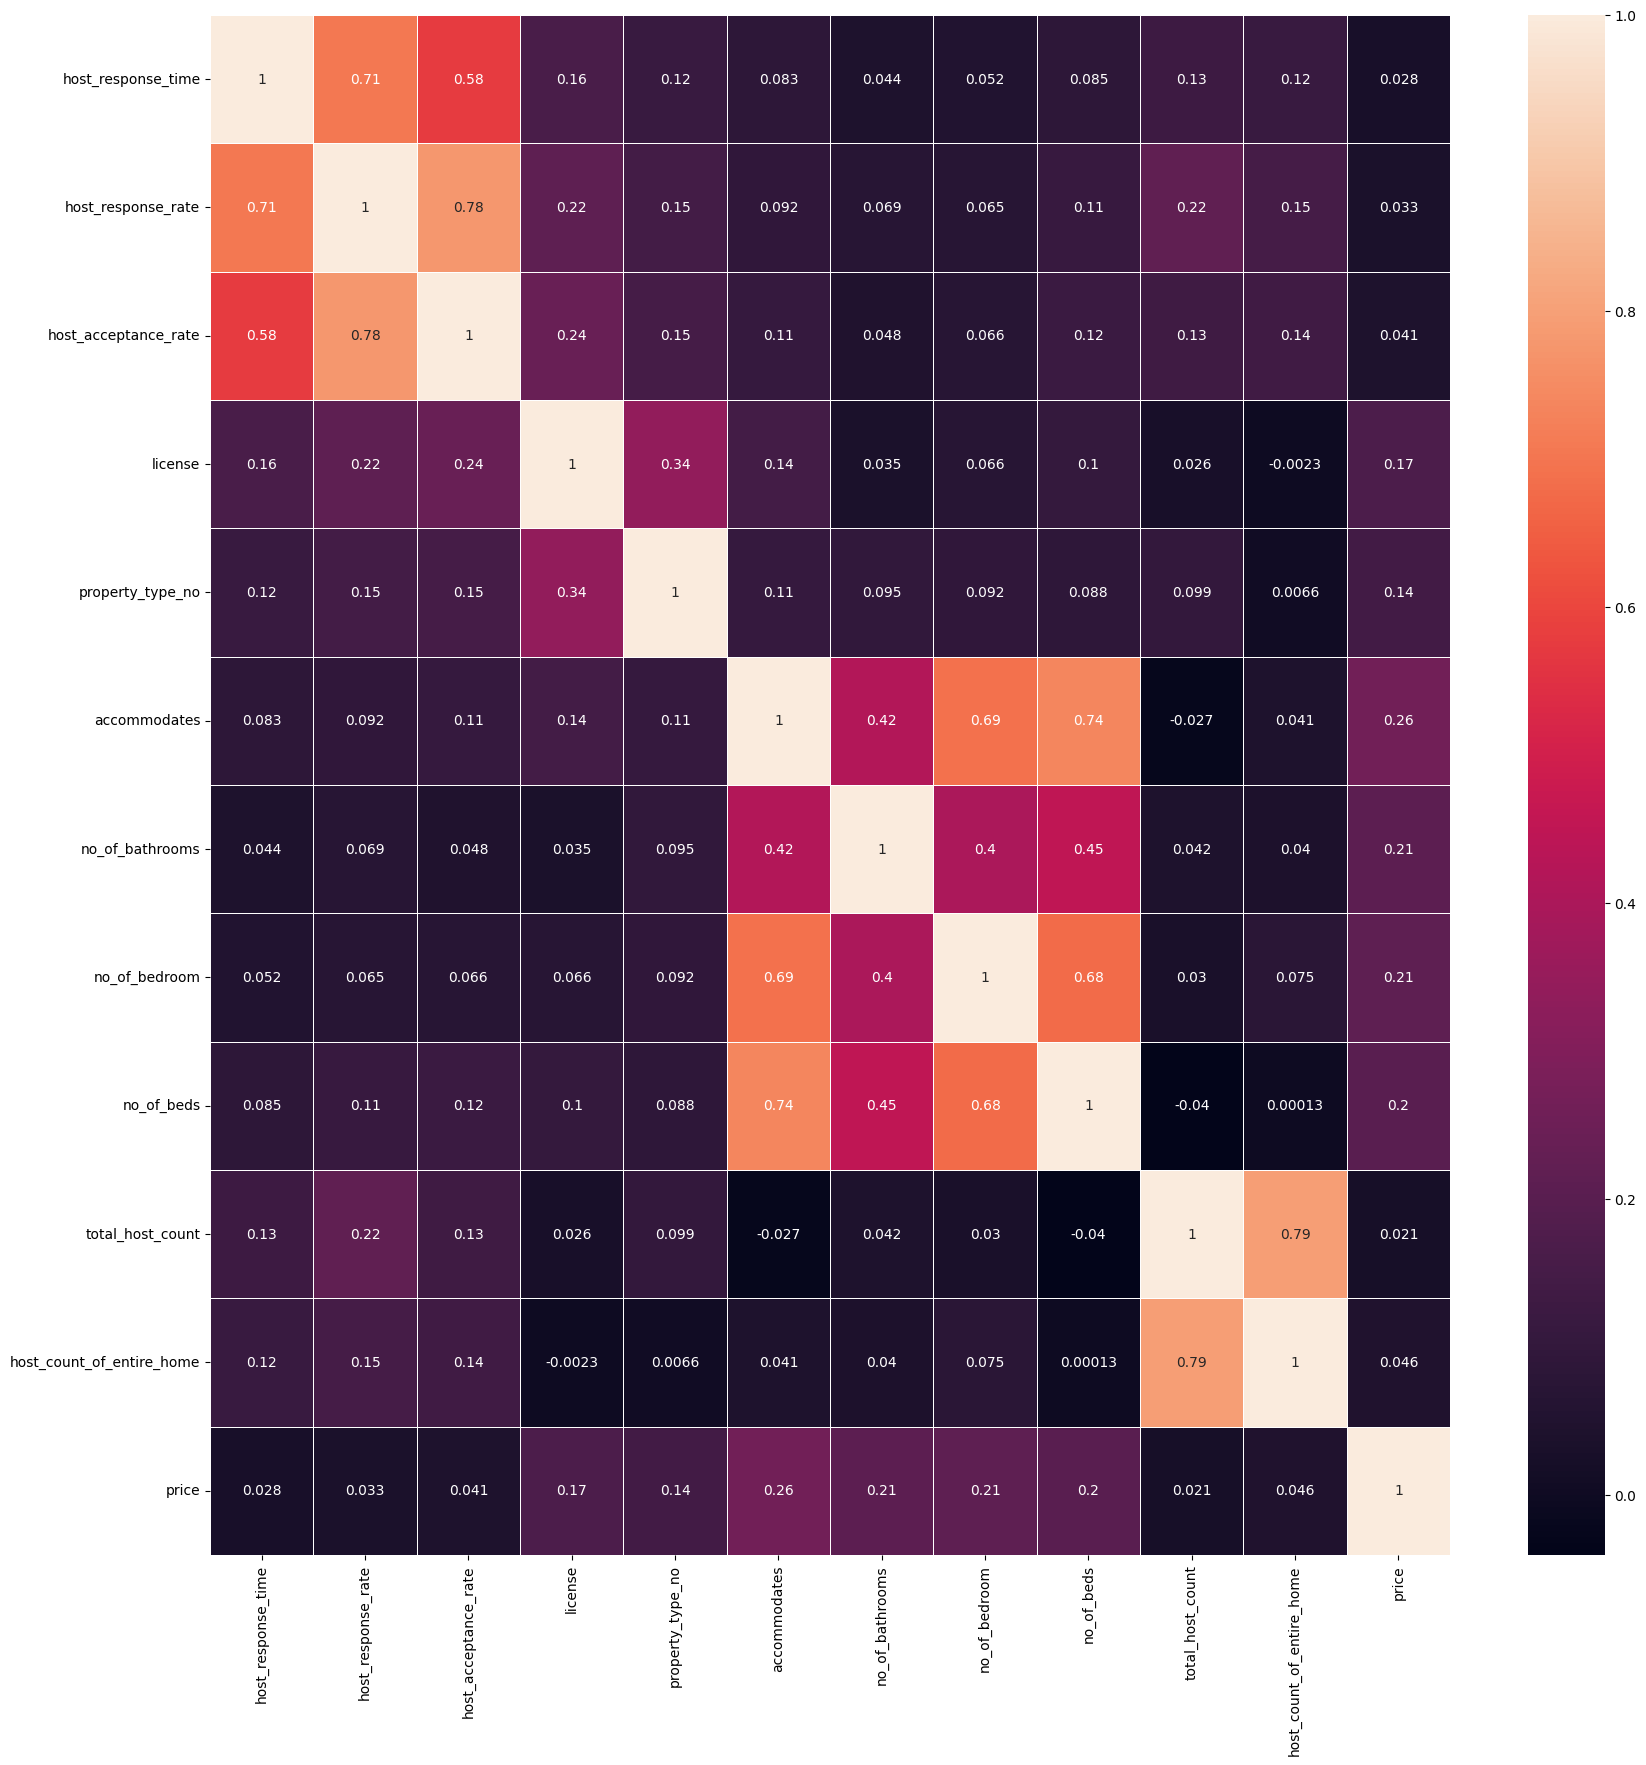

In [ ]:
import seaborn as sns

heapmap=Modeling_data
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(heapmap.corr(),annot=True, linewidths=.5,ax=ax)
Modeling_data.shape

**Detect Outlier**

<Axes: xlabel='price'>

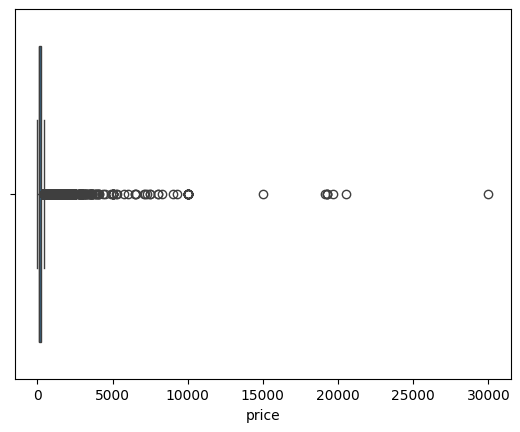

In [ ]:
sns.boxplot(x=Modeling_data['price'])


**Removed Outlier**

In [ ]:
Q1=Modeling_data['price'].quantile(0.25)
Q3=Modeling_data['price'].quantile(0.75)
IQR=Q3 - Q1


Modeling_data=Modeling_data[~((Modeling_data < (Q1 - 1.5 * IQR)) | (Modeling_data > (Q3 + 1.5 * IQR))).any(axis=1)]



**BOX Plot After Outlier**

<Axes: xlabel='price'>

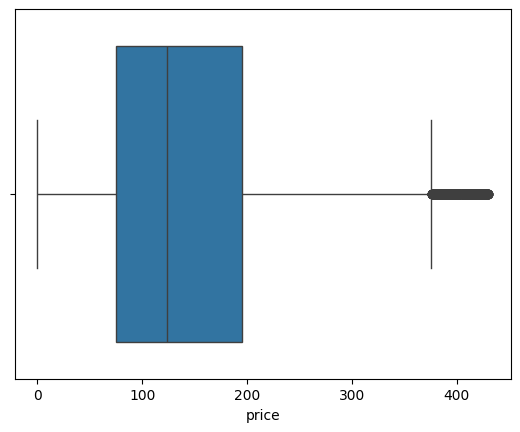

In [ ]:
sns.boxplot(x=Modeling_data['price'])


**Heat Map After Remove Outlier**

<Axes: >

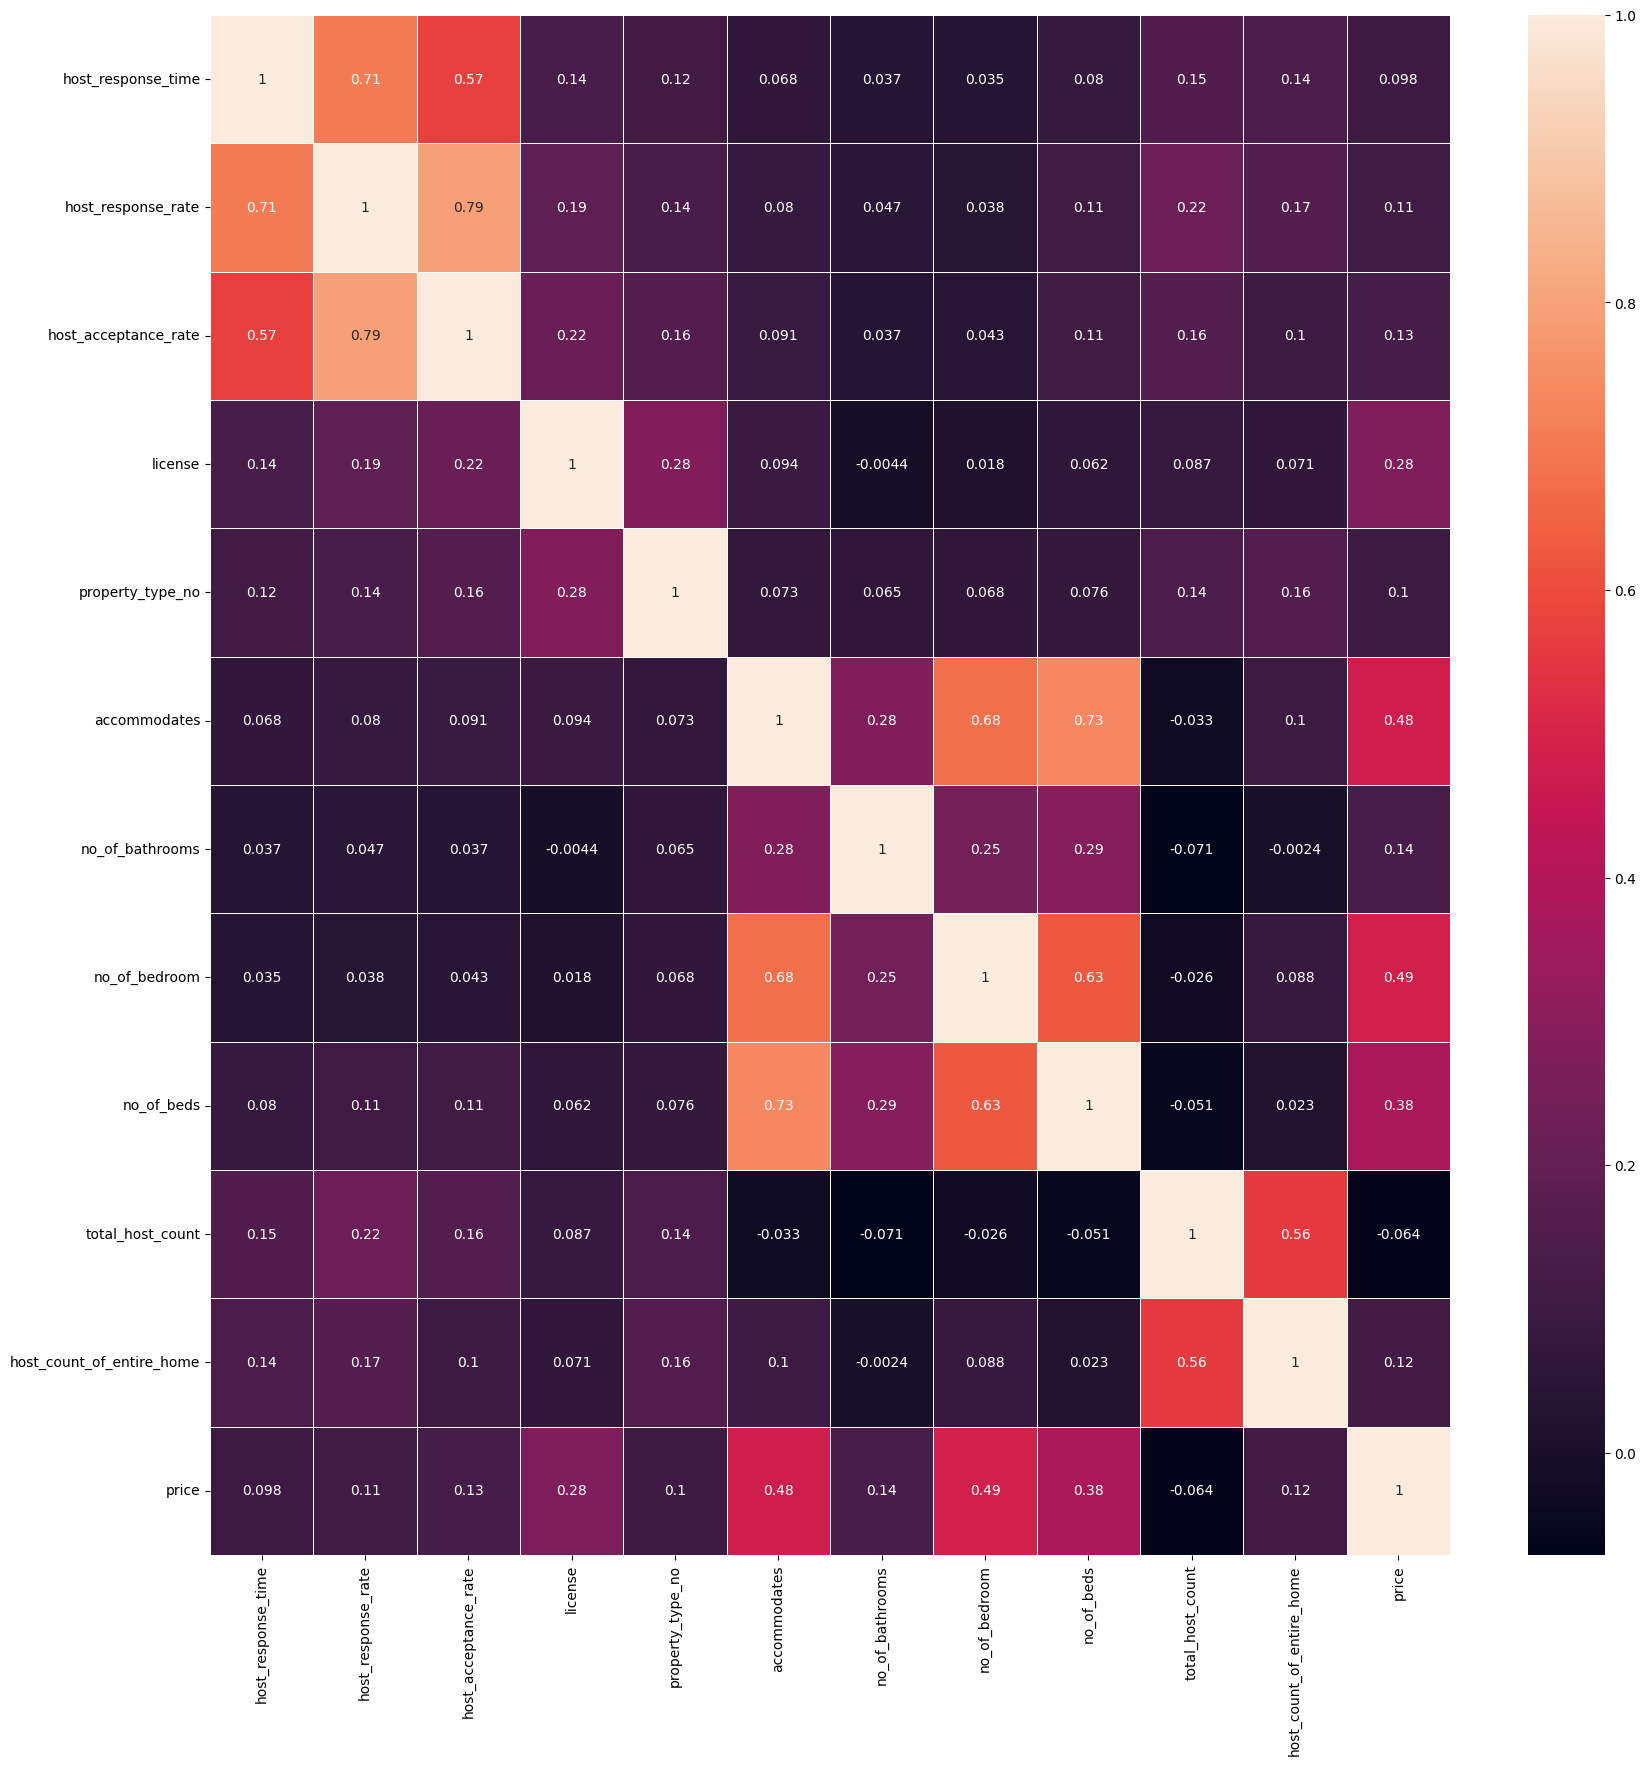

In [ ]:
heapmap=Modeling_data
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(heapmap.corr(),annot=True, linewidths=.5,ax=ax)


**Scattered  plot of No of bedroom with price**

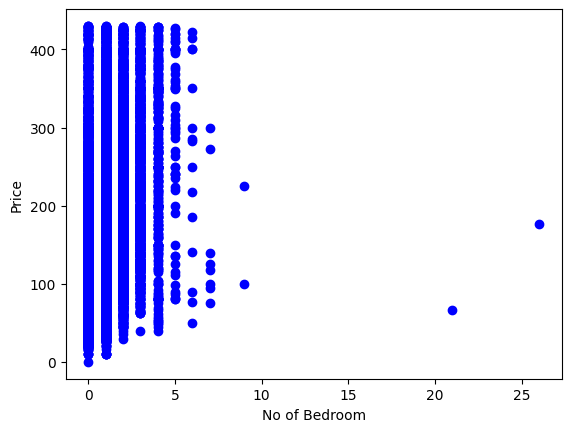

In [ ]:
plt.scatter(Modeling_data['no_of_bedroom'], Modeling_data['price'] , c ="blue")

plt.xlabel("No of Bedroom")
plt.ylabel("Price")
plt.show()

**Scattered  plot of Accomodates with price**

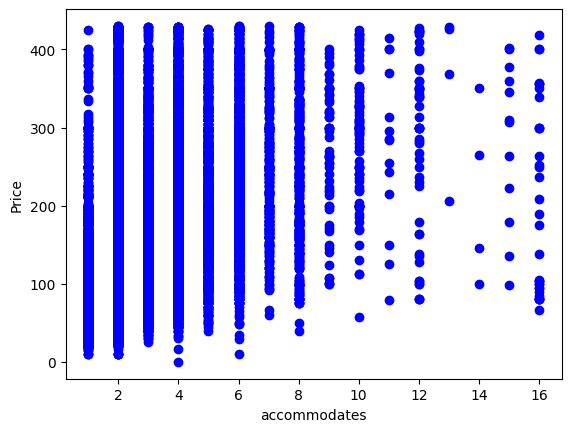

In [ ]:
plt.scatter(Modeling_data['accommodates'], Modeling_data['price'] , c ="blue")

plt.xlabel("accommodates")
plt.ylabel("Price")
plt.show()

**Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


X = Modeling_data.drop('price', axis=1)
y = Modeling_data['price']

# Split data into training and test sets li
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)


In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
MSE=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f' r2 Score: {r2}')


X_train.head()

Mean Absolute Error: 53.995295429923104
 r2 Score: 0.3698763217946852


,host_response_time,host_response_rate,host_acceptance_rate,license,property_type_no,accommodates,no_of_bathrooms,no_of_bedroom,no_of_beds,total_host_count,host_count_of_entire_home
6778,0,0.0,0.0,0,2,2,1.0,0.0,1.0,1,0
21126,2,75.0,94.0,0,1,2,1.0,1.0,1.0,1,1
14277,0,0.0,0.0,0,1,2,1.0,1.0,1.0,1,1
30212,2,100.0,81.0,0,2,2,1.0,0.0,1.0,134,12
38973,2,100.0,67.0,0,1,2,1.0,1.0,1.0,6,6


**XGBOOST MODEL**

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

xgb_r = xg.XGBRegressor(
                  n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train)

# Predict the model
y_pred = xgb_r.predict(X_test)

# MSE Computation

mae = mean_absolute_error(y_test, y_pred)
print("mae : % f" %(mae))

r2=r2_score(y_test, y_pred)
print(f' r2 Score: {r2}')

mae :  46.077824
 r2 Score: 0.5064657276378318


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
modelRandom = RandomForestRegressor(max_depth=2, random_state=0)
modelRandom.fit(X_train, y_train)

# Make predictions on the test set
y_pred = modelRandom.predict(X_test)

r2=r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f' r2 Score: {r2}')

Mean Absolute Error: 46.077823882173746
 r2 Score: 0.29424632909536874


**INSIGHT**

BUSINESS QUESTION ANSWER:

Q1) What is the optimal price for my property based on factors such as accomodation,no of bathrooms, no of bedrooms and beds etc?



**INPUT DATA FORTESTING**

In [ ]:
X_train.head()

,host_response_time,host_response_rate,host_acceptance_rate,license,property_type_no,accommodates,no_of_bathrooms,no_of_bedroom,no_of_beds,total_host_count,host_count_of_entire_home
6778,0,0.0,0.0,0,2,2,1.0,0.0,1.0,1,0
21126,2,75.0,94.0,0,1,2,1.0,1.0,1.0,1,1
14277,0,0.0,0.0,0,1,2,1.0,1.0,1.0,1,1
30212,2,100.0,81.0,0,2,2,1.0,0.0,1.0,134,12
38973,2,100.0,67.0,0,1,2,1.0,1.0,1.0,6,6


In [ ]:
input_data = [
    [2,100 , 77,  0,  1,	4,	1.0,	2.0,	2.0,	2	,2],
    [2,100 , 77,  1,	1,	4	, 1.0,	2.0,	2.0,	2 ,2],
    [2,100 , 77,  2,	1,	4,	1.0,	2.0,	2.0,	2 ,2],
    [1,20  , 17,  0,	2,	3,	1.0,	1.0,	1.0,	3 ,4],
   ]
prediction = model.predict(input_data)

print(f"Result with 0 License : {prediction[0]:.2f}")
print(f"Result with 1 License : {prediction[1]:.2f}")
print(f"Result with 2 License : {prediction[2]:.2f}")
print(f"Result with 2 License : {prediction[3]:.2f}")

Result with 0 License : 193.30
Result with 1 License : 238.24
Result with 2 License : 283.17
Result with 2 License : 147.80


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


HISTOGRAM

Result with 0 License : 193.30
Result with 1 License : 238.24
Result with 2 License : 283.17


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<BarContainer object of 3 artists>

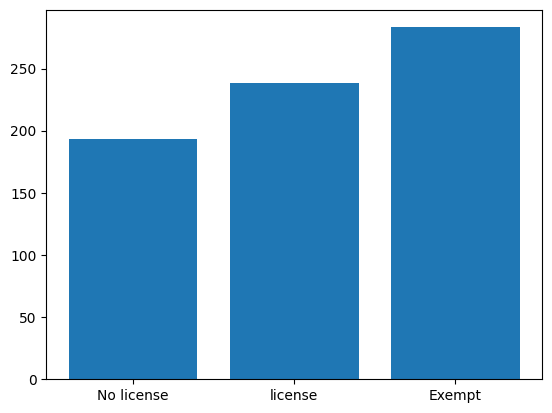

In [ ]:
input_data = [
    [2,100,77,  0	,1,	4,	1.0,	2.0,	2.0,	2	,2],
    [2,100,77,  1,	1,	4	,1.0,	2.0,	2.0,	2,	2],
    [2,100,77,  2,	1,	4,	1.0,	2.0,	2.0,	2,	2],

   ]
prediction = model.predict(input_data)

print(f"Result with 0 License : {prediction[0]:.2f}")
print(f"Result with 1 License : {prediction[1]:.2f}")
print(f"Result with 2 License : {prediction[2]:.2f}")


import matplotlib.pyplot as plt
import numpy as np

x = np.array(['No license', 'license', 'Exempt'])
y = np.array([prediction[0], prediction[1], prediction[2]])

plt.bar(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Result with 5 Accomodate : 205.56
Result with 4 Accomodate : 193.30
Result with 3 Accomodate : 181.05
Result with 2 Accomodate : 168.80
Result with 1 Accomodate : 156.54


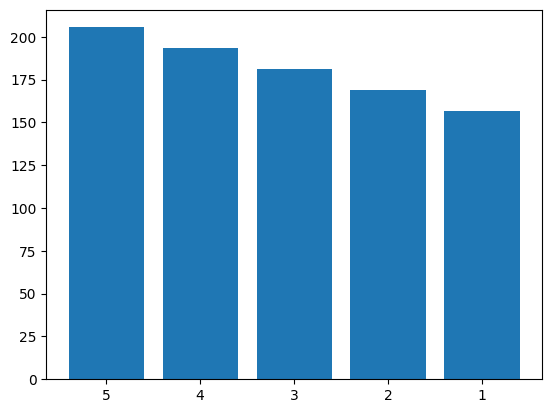

In [ ]:
#Accomodate changing

input_data = [
    [2,100,77,  0	,1,	5,	1.0,	2.0,	2.0,	2	,2],
    [2,100,77,  0	,1,	4,	1.0,	2.0,	2.0,	2	,2],
    [2,100,77,  0,	1,	3	,1.0,	2.0,	2.0,	2,	2],
    [2,100,77,  0,	1,	2	,1.0,	2.0,	2.0,	2,	2],
    [2,100,77,  0,	1,	1,	1.0,	2.0,	2.0,	2,	2],

   ]
prediction = model.predict(input_data)

print(f"Result with 5 Accomodate : {prediction[0]:.2f}")
print(f"Result with 4 Accomodate : {prediction[1]:.2f}")
print(f"Result with 3 Accomodate : {prediction[2]:.2f}")
print(f"Result with 2 Accomodate : {prediction[3]:.2f}")
print(f"Result with 1 Accomodate : {prediction[4]:.2f}")


import matplotlib.pyplot as plt
import numpy as np

x = np.array(['5', '4', '3', '2', '1'])
y = np.array([prediction[0], prediction[1], prediction[2], prediction[3], prediction[4] ])

plt.bar(x,y)

plt.hist(x)
plt.show()

**BUSINESS QUESTION ANSWER**


**Q2) What factors most significantly influence the pricing of Airbnb properties?**

**COEFFICIENTS OF LINEAR REGRESSION**

license: 44.93495385045748
no_of_bedroom: 28.838972450267775
accommodates: 12.253854644808948
no_of_bathrooms: -3.1993995543511473
host_response_time: 1.5353995004409016
no_of_beds: -1.3850318016208982
host_count_of_entire_home: 0.437647273504621
total_host_count: -0.25726792121839104
property_type_no: -0.10142143257997106
host_acceptance_rate: 0.07402906432111284
host_response_rate: 0.004200866088652666
Result with 0 listing count : 193.30
Result with 1 listing count : 238.24
Result with 2 listing count : 283.17


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<BarContainer object of 3 artists>

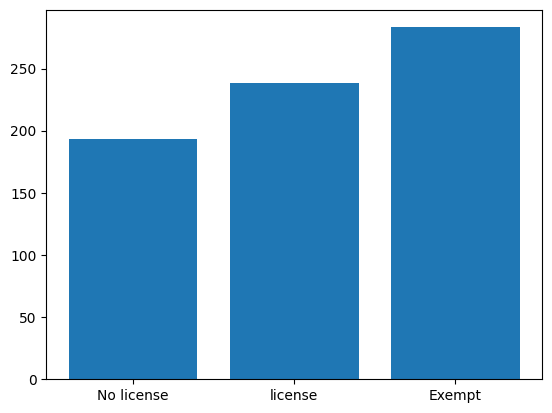

In [ ]:
# Y= mx + c

coeff_dict = dict(zip(X.columns, model.coef_))
sorted_coeff = sorted(coeff_dict.items(), key=lambda x: abs(x[1]), reverse=True)
for coeff in sorted_coeff:
   print(f'{coeff[0]}: {coeff[1]}')

# According to the Coefficient of Linear Regression License influence the most in Airbnb proterties pricing.

input_data = [
    [2,100,77,  0	,1,	4,	1.0,	2.0,	2.0,	2	,2],
    [2,100,77,  1,	1,	4	,1.0,	2.0,	2.0,	2,	2],
    [2,100,77,  2,	1,	4,	1.0,	2.0,	2.0,	2,	2],

   ]
prediction = model.predict(input_data)

print(f"Result with 0 listing count : {prediction[0]:.2f}")
print(f"Result with 1 listing count : {prediction[1]:.2f}")
print(f"Result with 2 listing count : {prediction[2]:.2f}")


import matplotlib.pyplot as plt
import numpy as np

x = np.array(['No license', 'license', 'Exempt'])
y = np.array([prediction[0], prediction[1], prediction[2]])

plt.bar(x,y)

# According to the Coefficient of Linear Regression License influence the most in Airbnb proterties pricing.

**BUSINESS QUESTION ANSWER **


**Q3) What is the effect of reviews on pricing?**

<ipython-input-156-26286fea51d7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heapmap.corr(),annot=True, linewidths=.5,ax=ax)


<Axes: >

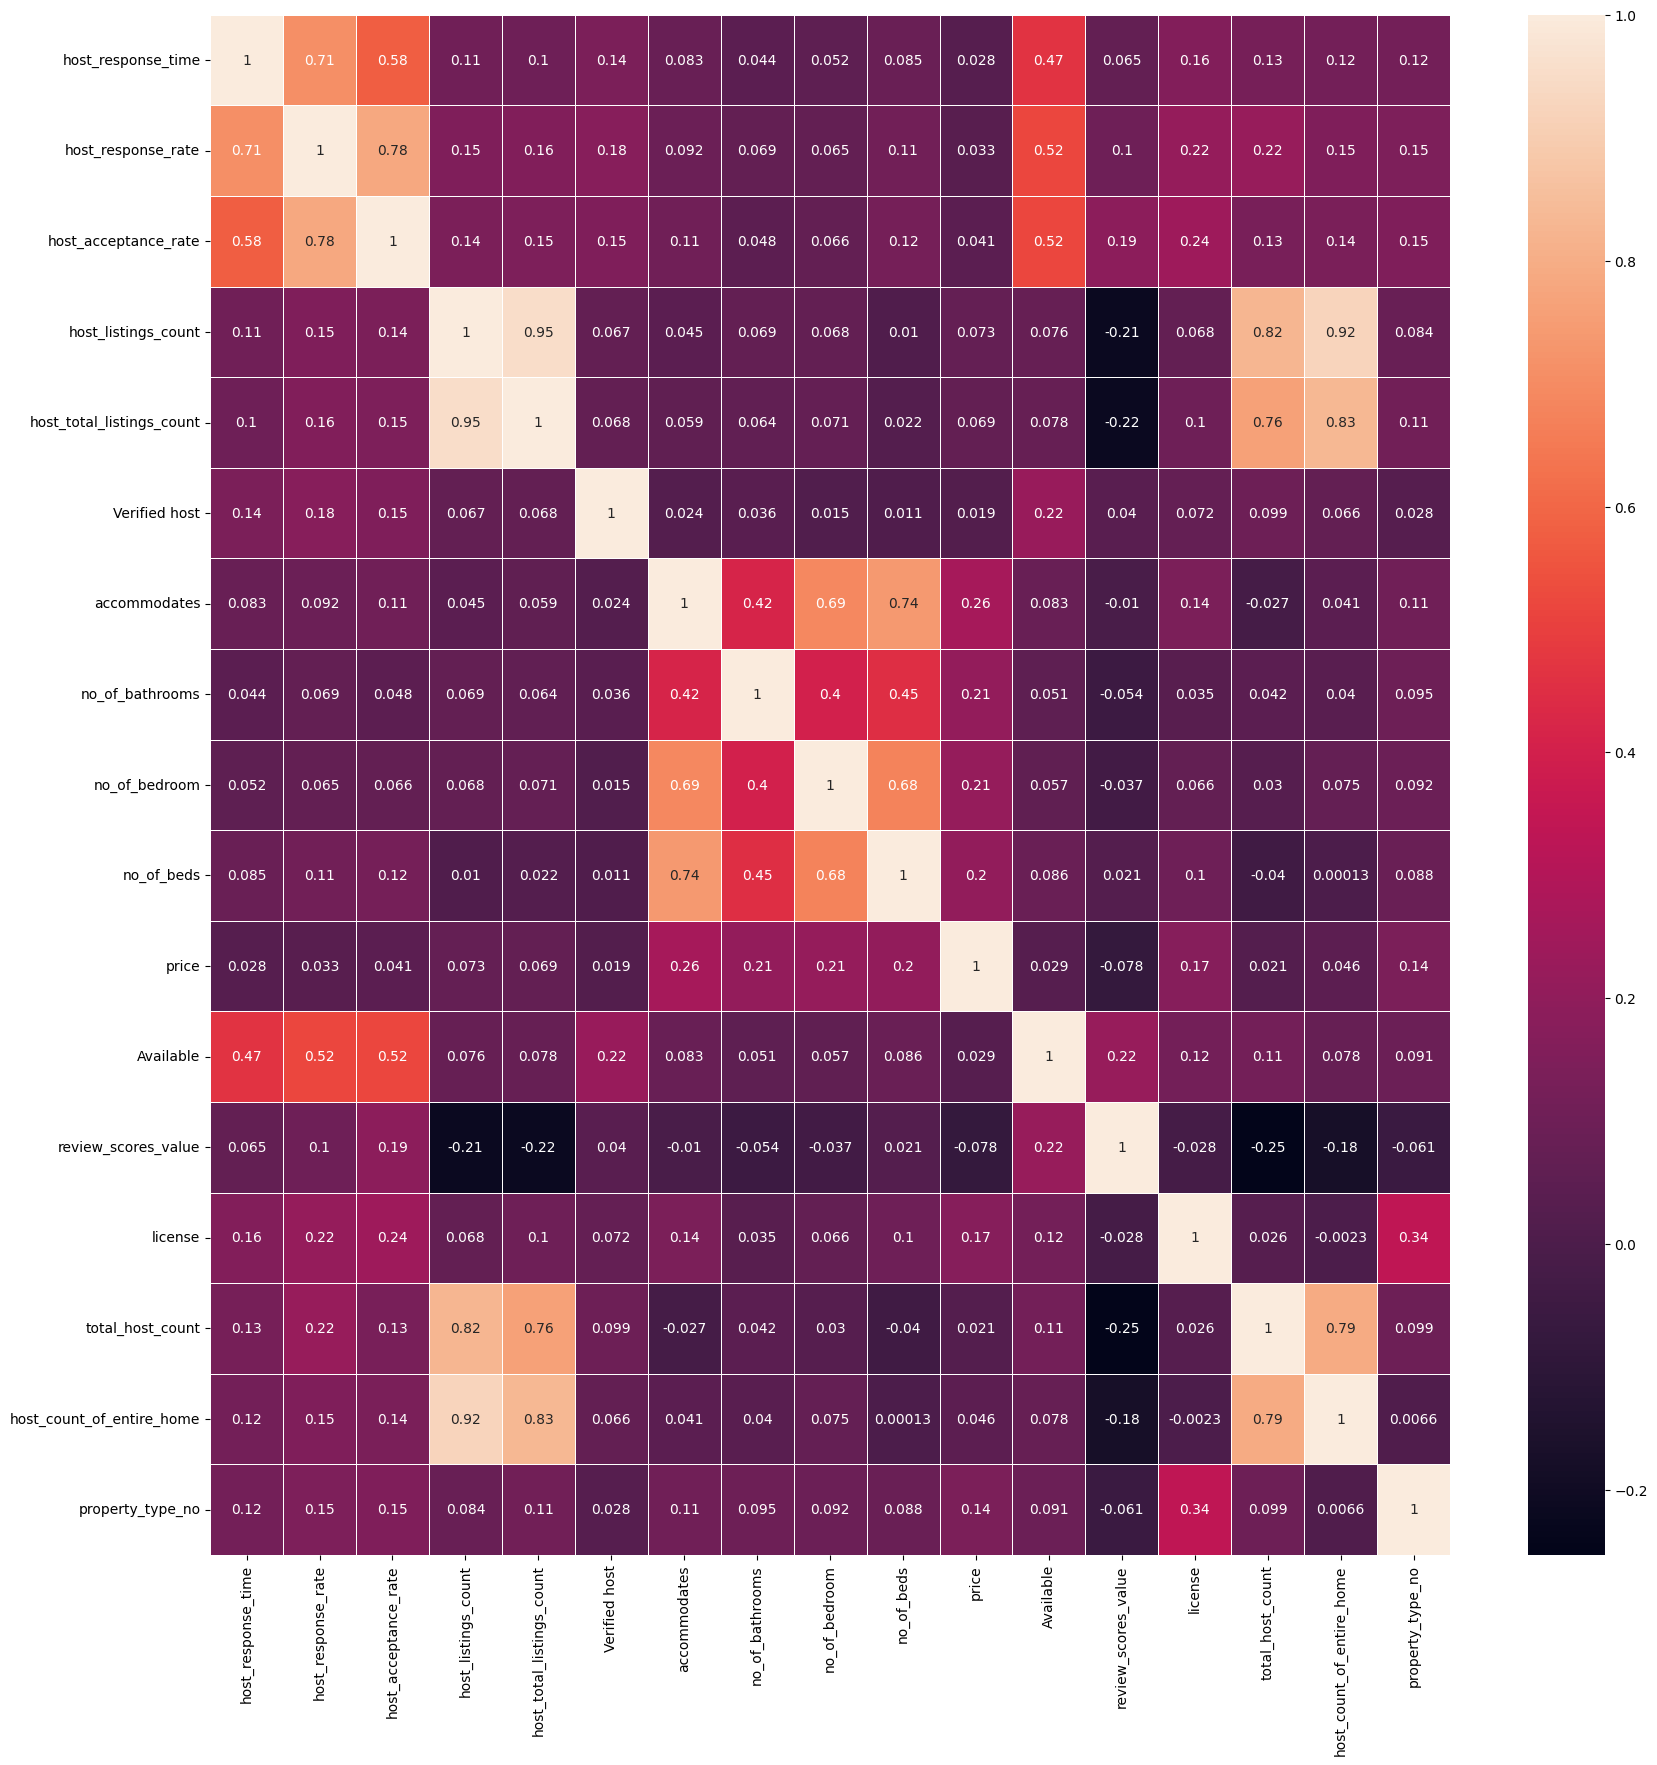

In [ ]:

heapmap=airbnb_data_copy
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(heapmap.corr(),annot=True, linewidths=.5,ax=ax)



#Hence their is no effect of reviews in Pricing

**BUSINESS QUESTION ANSWER**

**Q4) What is the effect of property type in pricing?**

license: 44.93495385045748
no_of_bedroom: 28.838972450267775
accommodates: 12.253854644808948
no_of_bathrooms: -3.1993995543511473
host_response_time: 1.5353995004409016
no_of_beds: -1.3850318016208982
host_count_of_entire_home: 0.437647273504621
total_host_count: -0.25726792121839104
property_type_no: -0.10142143257997106
host_acceptance_rate: 0.07402906432111284
host_response_rate: 0.004200866088652666
Result with 1 Property Type : 156.54
Result with 2 Property Type : 156.44
Result with 3 Property Type : 156.34


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<BarContainer object of 3 artists>

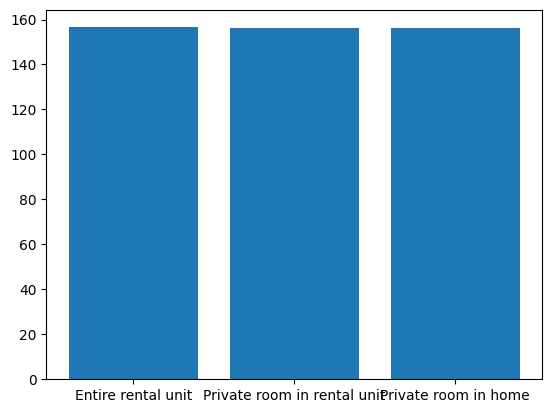

In [ ]:
coeff_dict = dict(zip(X.columns, model.coef_))
sorted_coeff = sorted(coeff_dict.items(), key=lambda x: abs(x[1]), reverse=True)
for coeff in sorted_coeff:
   print(f'{coeff[0]}: {coeff[1]}')

# According to the Coefficient of Linear Regression License influence the most in Airbnb proterties pricing.

input_data = [
    [2,100,77,  0	,1,	1,	1.0,	2.0,	2.0,	2	,2],
    [2,100,77,  0,	2,	1	,1.0,	2.0,	2.0,	2,	2],
    [2,100,77,  0,	3,	1,	1.0,	2.0,	2.0,	2,	2],

   ]
prediction = model.predict(input_data)

print(f"Result with 1 Property Type : {prediction[0]:.2f}")
print(f"Result with 2 Property Type : {prediction[1]:.2f}")
print(f"Result with 3 Property Type : {prediction[2]:.2f}")

x = np.array(['Entire rental unit' ,'Private room in rental unit', 'Private room in home'])
y = np.array([prediction[0], prediction[1], prediction[2]])

plt.bar(x,y)

**BUSINESS QUESTION ANSWER**

**Q5) what are the difference in price according to the feature?**

**Q6) what are the factors through which host can raise their pricing?**

license: 44.93495385045748
no_of_bedroom: 28.838972450267775
accommodates: 12.253854644808948
no_of_bathrooms: -3.1993995543511473
host_response_time: 1.5353995004409016
no_of_beds: -1.3850318016208982
host_count_of_entire_home: 0.437647273504621
total_host_count: -0.25726792121839104
property_type_no: -0.10142143257997106
host_acceptance_rate: 0.07402906432111284
host_response_rate: 0.004200866088652666


<Axes: >

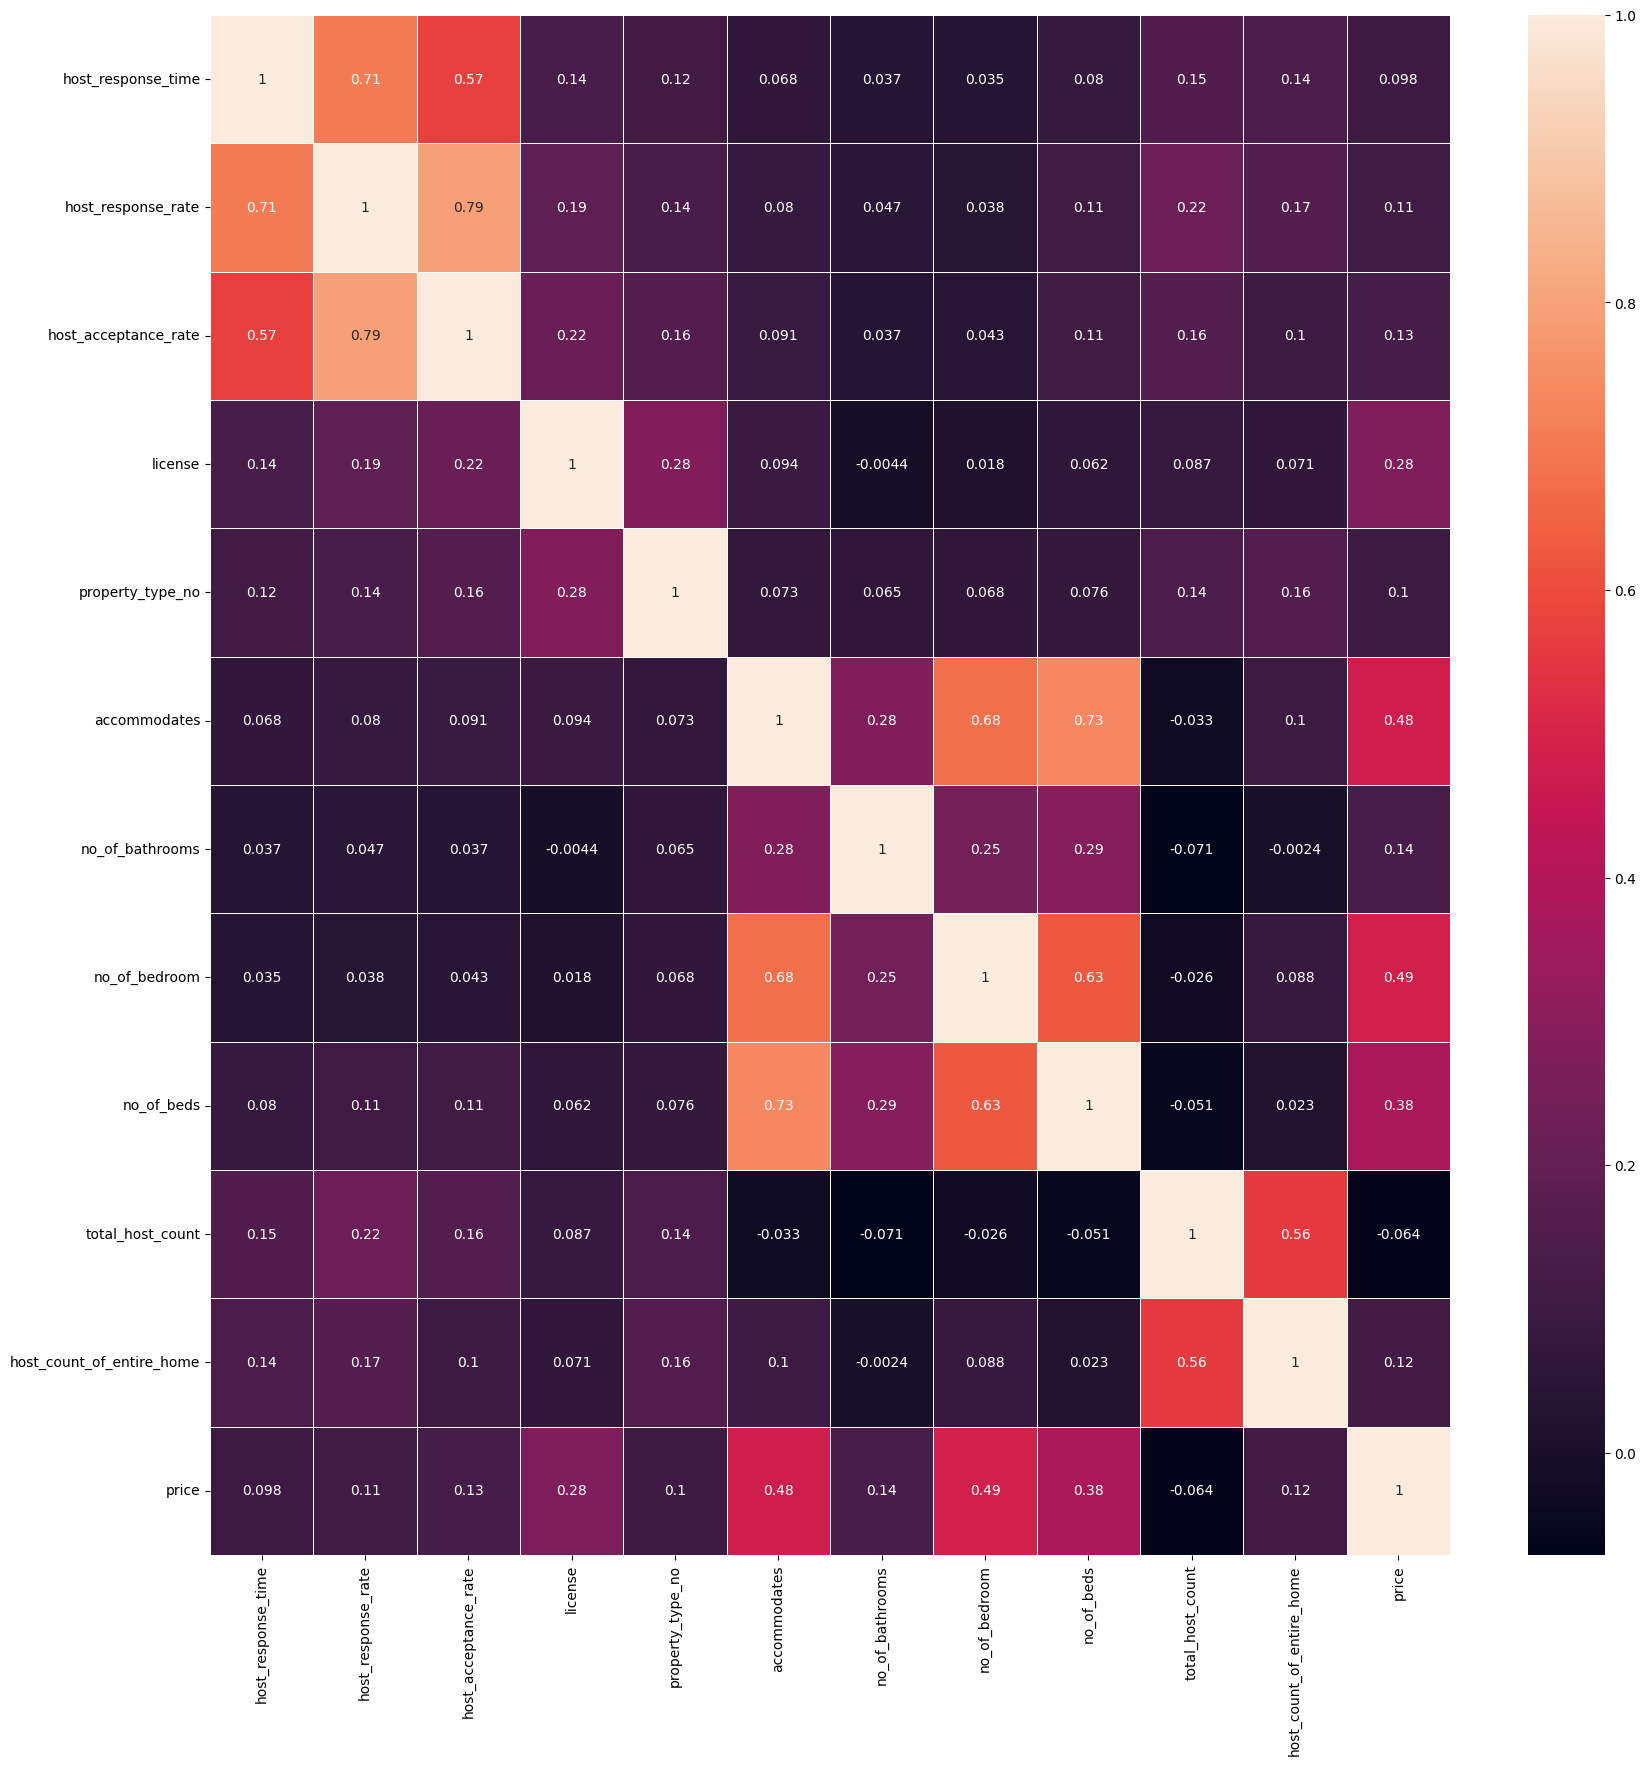

In [ ]:
coeff_dict = dict(zip(X.columns, model.coef_))
sorted_coeff = sorted(coeff_dict.items(), key=lambda x: abs(x[1]), reverse=True)
for coeff in sorted_coeff:
   print(f'{coeff[0]}: {coeff[1]}')

# According to the Coefficient of Linear Regression License influence the most in Airbnb proterties pricing.

input_data = [
    [2,100,77,  0	,1,	1,	1.0,	2.0,	2.0,	2	,2],
    [2,100,77,  0,	2,	1	,1.0,	2.0,	2.0,	2,	2],
    [2,100,77,  0,	3,	1,	1.0,	2.0,	2.0,	2,	2],

   ]

heapmap=Modeling_data
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(heapmap.corr(),annot=True, linewidths=.5,ax=ax)